<a href="https://colab.research.google.com/github/sargent-mg/ml-zoomcamp/blob/main/08-deep-learning/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the dataset:

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


The dataset contains:
- 10 clothing categories (dress, hat, longsleeve, outwear, pants, shirt, shoes, shorts, skirt, t-shirt)
- Training, validation, and test splits
- Pre-organized directory structure

## 1. Introduction to PyTorch

PyTorch is a popular open-source deep learning framework developed by Facebook's AI Research lab. It provides:
- Dynamic computation graphs (define-by-run)
- Pythonic API
- Strong GPU acceleration
- Rich ecosystem of tools and libraries

Key Differences from TensorFlow/Keras:

| TensorFlow/Keras | PyTorch |
|------------------|---------|
| `model.fit()` | Manual training loop |
| `ImageDataGenerator` | `Dataset` + `DataLoader` + `transforms` |
| `keras.layers.Dense()` | `nn.Linear()` |
| `keras.Model` | `nn.Module` |
| `.h5` or `.keras` files | `.pth` or `.pt` files |

In [ ]:
import torch

## 2. PyTorch and Image Loading

PyTorch is a popular open-source deep learning framework developed by Facebook's AI Research lab.

Key differences from TensorFlow/Keras:
- Dynamic computation graphs (define-by-run)
- More Pythonic and flexible
- Manual training loops instead of `model.fit()`
- Explicit device management (CPU/GPU)

### Loading and Preprocessing Images

Images are represented as 3D arrays:
- Height × Width × Channels
- Channels: RGB (Red, Green, Blue)
- Each channel: 8 bits (0-255 values)

In [ ]:
from PIL import Image
import numpy as np

# Load an image.
img = Image.open('clothing-dataset-small/train/pants/0098b991-e36e-4ef1-b5ee-4154b21e2a92.jpg')

# Resize to target size
img = img.resize((224, 224))

# Convert to numpy array
x = np.array(img)
print(x.shape)  # (224, 224, 3)

(224, 224, 3)


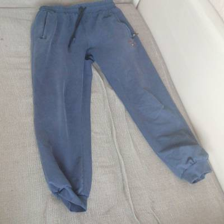

In [ ]:
img

## 3. Pre-trained Models

Instead of training from scratch, we'll use a model pre-trained on ImageNet (1.4M images, 1000 classes).

Why use pre-trained models?

- Already learned to recognize edges, textures, shapes
- Saves training time
- Works well even with small datasets
- Better performance than training from scratch

### Using MobileNetV2

We'll use MobileNetV2 (in the original tutorial we used Xception):

In [ ]:
import torchvision.models as models
from torchvision import transforms

In [ ]:
# Load pre-trained model
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 152MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Preprocessing for MobileNetV2
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
x = preprocess(img)

In [ ]:
batch_t = torch.unsqueeze(x, 0)

In [ ]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
x.shape

torch.Size([3, 224, 224])

In [ ]:
# We'll make a prediction.
with torch.no_grad():
    output = model(batch_t)

In [ ]:
output.shape

torch.Size([1, 1000])

In [ ]:
_, indices = torch.sort(output, descending=True)
indices

tensor([[608, 834, 841, 474, 689, 824, 869, 906, 501, 885, 601, 457, 911, 735,
         655, 775, 697, 431, 610, 842, 568, 411, 617, 452, 678, 516, 797, 796,
         414, 578, 399, 434, 570, 630, 523, 591, 636, 793, 464, 435, 903, 658,
         840, 638, 515, 894, 588, 614, 691, 606, 502, 589, 465, 808, 672, 749,
         837, 780, 830, 529, 731, 728, 480, 643, 680, 419, 887, 514, 823, 790,
         876, 897, 459, 914, 451, 552, 785, 777, 473, 223, 389, 652, 772, 774,
         806, 490, 597, 233, 615, 512, 838, 836, 639, 667, 794, 702, 600, 715,
         153, 627, 258, 977, 520, 400,  34, 395, 499, 237, 177, 463, 861, 982,
         748, 585, 713, 559, 443, 487, 831, 999, 770, 676, 477, 257, 750, 882,
         183, 792, 169, 929, 151, 872, 602, 358, 587, 182, 584, 518, 195, 192,
         250, 391, 461, 265, 447, 170, 558, 259, 172, 811, 187, 224, 215, 700,
         801, 879,   0, 813, 851, 433, 204, 439, 534, 445, 683, 251, 256, 739,
         171, 416, 546, 173, 456, 222, 160, 741, 784

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt

--2025-11-27 23:16:49--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2025-11-27 23:16:49 (14.6 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Load ImageNet class names
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: jean
2: suit
3: sweatshirt
4: cardigan
5: overskirt


Key concepts:
- Input size: MobileNetV2 expects 224×224 images (Xception uses 299×299)
- Normalization: Images scaled with ImageNet mean and std
- Batch size: Number of images processed together
- Batch dimension: Shape (batch_size, channels, height, width) - e.g., (1, 3, 224, 224)

## 4. Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are specialized neural networks for processing grid-like data such as images.


## 5. Transfer Learning

Transfer Learning reuses a model trained on one task (ImageNet) for a different task (clothing classification).

Approach:

1. Load pre-trained model (feature extractor)
2. Remove original classification head
3. Freeze convolutional layers
4. Add custom layers for our task
5. Train only the new layers

### Custom Dataset Class

First, create a PyTorch `Dataset` to load images:

In [ ]:
import os
from torch.utils.data import Dataset

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### Simple Preprocessing

In [ ]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - just resize and normalize
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

### Create DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Build the Model

In [ ]:
import torch.nn as nn

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

### Train the Model

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClothingClassifierMobileNet(num_classes=10)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

Now train it:

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over the training data
    for inputs, labels in train_loader:
        # Move data to the specified device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Disable gradient calculation for validation
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Move data to the specified device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            # Update total and correct predictions
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/10
  Train Loss: 1.4563, Train Acc: 0.6219
  Val Loss: 0.8989, Val Acc: 0.7361
Epoch 2/10
  Train Loss: 0.7618, Train Acc: 0.7643
  Val Loss: 0.8847, Val Acc: 0.7654
Epoch 3/10
  Train Loss: 0.7660, Train Acc: 0.7764
  Val Loss: 0.9286, Val Acc: 0.7302
Epoch 4/10
  Train Loss: 0.6504, Train Acc: 0.8057
  Val Loss: 1.1864, Val Acc: 0.7214
Epoch 5/10
  Train Loss: 0.6577, Train Acc: 0.8129
  Val Loss: 0.8806, Val Acc: 0.7742
Epoch 6/10
  Train Loss: 0.5584, Train Acc: 0.8390
  Val Loss: 1.1510, Val Acc: 0.7361
Epoch 7/10
  Train Loss: 0.5853, Train Acc: 0.8442
  Val Loss: 0.9658, Val Acc: 0.7713
Epoch 8/10
  Train Loss: 0.5255, Train Acc: 0.8468
  Val Loss: 0.9106, Val Acc: 0.7830
Epoch 9/10
  Train Loss: 0.4877, Train Acc: 0.8644
  Val Loss: 1.0349, Val Acc: 0.7977


KeyboardInterrupt: 

Let's put it inside a function so it's easier for us to call it:


In [ ]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

## 6. Tuning the Learning Rate

The learning rate controls how much to update model weights during training. It's one of the most important hyperparameters.

Analogy: Reading speed
- Too fast: Skip details, poor understanding (may not converge)
- Too slow: Never finish the book (training takes too long)
- Just right: Good comprehension and efficiency

Experimentation approach:

1. Try multiple values: `[0.0001, 0.001, 0.01, 0.1]`
2. Train for a few epochs each
3. Compare validation accuracy
4. Choose the rate with best performance and smallest train/val gap


In [ ]:
def make_model(learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

Let's test different learning rates:


In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f'\n=== Learning Rate: {lr} ===')
    model, optimizer = make_model(learning_rate=lr)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== Learning Rate: 0.0001 ===


KeyboardInterrupt: 

## 7. Model Checkpointing

Checkpointing saves the model during training to:
- Keep the best performing model
- Resume training if interrupted
- Avoid losing progress

Update the train function:

In [ ]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

         # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'mobilenet_v2_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

## 8. Adding Inner Layers

We can add intermediate dense layers between feature extraction and output:

In [ ]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)  # New inner layer
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [ ]:
def make_model(learning_rate=0.001, size_inner=100):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [ ]:
# I think this it's not used.
for size_inner in [1000, 500, 100]:
  print("Size_inner = ", size_inner)
  model, optimizer = make_model(
      learning_rate=0.001,
      size_inner=size_inner
      )

  train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

In [ ]:
size_inner = 100
learning_rate = 0.001

model, optimizer = make_model(
    learning_rate=learning_rate,
    size_inner=size_inner
)

train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

## 9. Dropout Regularization

Dropout randomly drops neurons during training to prevent overfitting.

How it works:
- Training: randomly set fraction of activations to 0
- Inference: use all neurons (dropout disabled automatically)
- Creates ensemble effect

Benefits:
- Prevents relying on specific features
- Forces learning robust patterns
- Reduces overfitting

In [ ]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

Update our function:

In [ ]:
def make_model(
        learning_rate=0.001,
        size_inner=100,
        droprate=0.2
):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner,
        droprate=droprate
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [ ]:
num_epochs = 50

for droprate in [0.1, 0.2, 0.5, 0.7]:
  print("Droprate = ", droprate)
  model, optimizer = make_model(
      learning_rate=0.001,
      size_inner=100,
      droprate=droprate
  )

  train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Droprate =  0.1
Epoch 1/50
  Train Loss: 1.3445, Train Acc: 0.5668
  Val Loss: 0.8184, Val Acc: 0.7361
Checkpoint saved: mobilenet_v2_01_0.736.pth
Epoch 2/50
  Train Loss: 0.7579, Train Acc: 0.7575
  Val Loss: 0.7007, Val Acc: 0.7390
Checkpoint saved: mobilenet_v2_02_0.739.pth
Epoch 3/50
  Train Loss: 0.6233, Train Acc: 0.7937
  Val Loss: 0.6714, Val Acc: 0.7595
Checkpoint saved: mobilenet_v2_03_0.760.pth
Epoch 4/50
  Train Loss: 0.5705, Train Acc: 0.8028
  Val Loss: 0.5516, Val Acc: 0.8152
Checkpoint saved: mobilenet_v2_04_0.815.pth
Epoch 5/50
  Train Loss: 0.5059, Train Acc: 0.8253
  Val Loss: 0.5907, Val Acc: 0.8035
Epoch 6/50
  Train Loss: 0.4620, Train Acc: 0.8475
  Val Loss: 0.5873, Val Acc: 0.7977
Epoch 7/50
  Train Loss: 0.4477, Train Acc: 0.8468
  Val Loss: 0.5522, Val Acc: 0.8035
Epoch 8/50
  Train Loss: 0.4158, Train Acc: 0.8660
  Val Loss: 0.5644, Val Acc: 0.8006
Epoch 9/50
  Train Loss: 0.4036, Train Acc: 0.8582
  Val Loss: 0.5289, Val Acc: 0.8299
Checkpoint saved: mobilen

KeyboardInterrupt: 

## 10. Data Augmentation

Data Augmentation artificially increases dataset size by applying random transformations to training images.

Common transformations:
- Rotation
- Horizontal/vertical flipping
- Zooming (random cropping)
- Shifting
- Shearing

Important rules:
- ✅ Apply ONLY to training data
- ❌ Never augment validation/test data

### Augmented Training Transforms

In [ ]:
# Training transforms WITH augmentation
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Validation transforms - NO augmentation, same as before
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

When to use augmentation:
1. Small datasets
2. Risk of overfitting
3. Images can appear in different orientations

Tips:
- Choose augmentations that make sense for your data
- Too much augmentation can hurt performance
- Usually requires longer training (more epochs)
- If no improvement after ~20 epochs, don't use it


## 11. Using the Trained Model

### Loading a Saved Model

In [ ]:
import glob

# Find best checkpoint
list_of_files = glob.glob('mobilenet_v2_*.pth')
latest_file = max(list_of_files, key=os.path.getctime)
print(f"Loading model from: {latest_file}")

# Load model
# The checkpoint 'mobilenet_v2_13_0.821.pth' was saved with size_inner=100 (from previous training)
model = ClothingClassifierMobileNet(size_inner=100, droprate=0.2, num_classes=10)
model.load_state_dict(torch.load(latest_file))
model.to(device)
model.eval()

Loading model from: mobilenet_v2_13_0.821.pth


ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

### Making Predictions

In [ ]:
!pip install keras_image_helper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 131.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "

In [ ]:
from keras_image_helper import create_preprocessor
import numpy as np

def preprocess_pytorch_style(X):
    # X: shape (1, 224, 224, 3), dtype=float32, values in [0, 255]
    X = X / 255.0

    mean = np.array([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = np.array([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)

    # Convert NHWC → NCHW (batch, height, width, channels → batch, channels, height, width)
    X = X.transpose(0, 3, 1, 2)

    # Normalize
    X = (X - mean) / std

    return X.astype(np.float32)

preprocessor = create_preprocessor(preprocess_pytorch_style, target_size=(224, 224))

# Predict from URL
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
X = torch.Tensor(X).to(device)

with torch.no_grad():
    pred = model(X).cpu().numpy()[0]

classes = [
    "dress", "hat", "longsleeve", "outwear", "pants",
    "shirt", "shoes", "shorts", "skirt", "t-shirt"
]

result = dict(zip(classes, pred.tolist()))
print(result)

{'dress': 0.11260540783405304, 'hat': -7.777731895446777, 'longsleeve': -1.7832870483398438, 'outwear': -0.6925902962684631, 'pants': 4.782951831817627, 'shirt': -0.5334362387657166, 'shoes': -6.162081241607666, 'shorts': 1.1019656658172607, 'skirt': -2.7089529037475586, 't-shirt': -3.099774122238159}


## 12. Exporting to ONNX

ONNX (Open Neural Network Exchange) is a format for model interoperability.

Benefits:
- Deploy on different platforms
- Use optimized runtimes (ONNX Runtime)
- Better inference performance
- Language-agnostic deployment


In [ ]:
!pip install onnx
!pip install onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.0/683.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 11.3 MB/s eta 0:00:00


In [ ]:
# Create dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"Model exported to {onnx_path}")

/tmp/ipython-input-2777746402.py:7: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.
Model exported to clothing_classifier_mobilenet_v2.onnx


We will use it in the Serverless module.


## Summary

## TensorFlow/Keras vs PyTorch Quick Reference

| Concept | TensorFlow/Keras | PyTorch |
|---------|------------------|---------|
| Framework | High-level API (Keras) on TensorFlow | Low-level, explicit control |
| Data Loading | `ImageDataGenerator` | `Dataset` + `DataLoader` |
| Transforms | `preprocessing_function` | `transforms.Compose()` |
| Model | Functional API or Sequential | `nn.Module` class |
| Layers | `keras.layers.Dense()` | `nn.Linear()` |
| Training | `model.fit()` | Manual training loop |
| Loss | `CategoricalCrossentropy` | `CrossEntropyLoss` |
| Optimizer | `keras.optimizers.Adam` | `optim.Adam` |
| Saving | `.h5` or `.keras` | `.pth` or `.pt` |
| Checkpointing | `ModelCheckpoint` callback | Manual in training loop |
| Device | Automatic | Explicit `.to(device)` |

## Key Concepts Learned

1. Transfer Learning: Reuse pre-trained models for new tasks
2. CNN Architecture: Conv layers → Pooling → Dense layers
3. Hyperparameter Tuning: Learning rate is critical
4. Regularization: Dropout prevents overfitting
5. Data Augmentation: Increases effective dataset size
6. Model Checkpointing: Save best models during training
7. PyTorch Workflow: Dataset → DataLoader → Model → Training Loop

## Best Practices

1. Start with pre-trained models (transfer learning)
2. Freeze convolutional layers initially
3. Use appropriate normalization (match pre-training)
4. Experiment with one hyperparameter at a time
5. Monitor train/val gap for overfitting
6. Use checkpointing to save best models
7. Augment training data only, not validation
8. Train longer with dropout and augmentation
9. Use GPU when available: `torch.cuda.is_available()`

## Next Steps

- Try different pre-trained models (ResNet, EfficientNet)
- Experiment with learning rate schedulers
- Fine-tune the entire model (unfreeze convolutional layers)
- Try different optimizers (SGD with momentum, AdamW)
- Deploy the ONNX model (see [mlzoomcamp-serverless](../mlzoomcamp-serverless/))
- Explore the original [TensorFlow/Keras version](08-deep-learning/)

## Resources

- [PyTorch Documentation](https://pytorch.org/docs/)
- [torchvision Models](https://pytorch.org/vision/stable/models.html)
- [ML Zoomcamp Course](https://github.com/DataTalksClub/machine-learning-zoomcamp)
- [Original Tutorial (TensorFlow/Keras)](08-deep-learning/)
- [ONNX Documentation](https://onnx.ai/)

## Credits

This workshop is based on the ML Zoomcamp Deep Learning module by [Alexey Grigorev](https://github.com/alexeygrigorev), adapted to use PyTorch instead of TensorFlow/Keras.
